In [112]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression , Ridge, Lasso
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [68]:
boston = pd.read_csv('Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [69]:
X = boston.drop('medv', axis=1)
y = boston['medv']
X_train, X_test, Y_train , Y_test = train_test_split(X,y,test_size=0.3, random_state=24)


In [70]:
lr = LinearRegression()


In [71]:
lr.fit(X_train, Y_train)

LinearRegression()

In [72]:
y_pred = lr.predict(X_test)

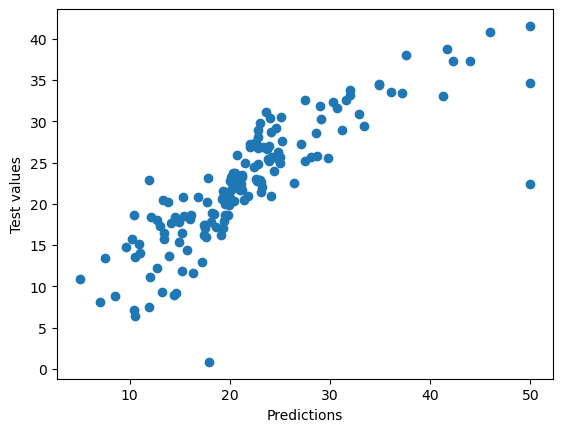

In [73]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Predictions')
plt.ylabel('Test values')
plt.show()

In [74]:
print(mean_squared_error(Y_test,  y_pred))

20.67071275646103


In [75]:
y_bar = np.mean(Y_test)

# Insurance Dataset Question 

In [77]:
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
X = insurance[['age' , 'bmi', 'children']]
y = insurance['charges']
X_train, X_test, Y_train , Y_test = train_test_split(X,y,test_size=0.3, random_state=24)


In [79]:
lr = LinearRegression()


In [80]:
lr.fit(X_train, Y_train)

LinearRegression()

In [81]:
y_pred = lr.predict(X_test)

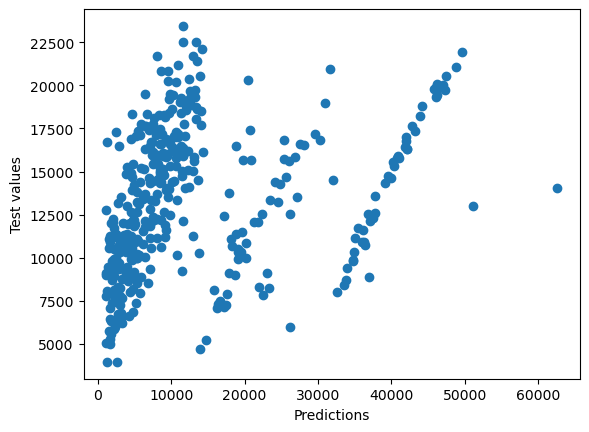

In [82]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Predictions')
plt.ylabel('Test values')
plt.show()

In [83]:
print(mean_squared_error(Y_test,  y_pred))

137913239.58543932


In [84]:
print(r2_score(Y_test, y_pred))

0.09484846679032788


In [85]:
#Now including Other categorical columns also 

In [86]:
X = insurance.drop('charges', axis = 1)
X_ohe = pd.get_dummies(X, drop_first=True)
X_ohe
#X_ohe = X_ohe.drop(['sex_male', 'smoker_yes', 'region_northeast' ], axis = 1)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


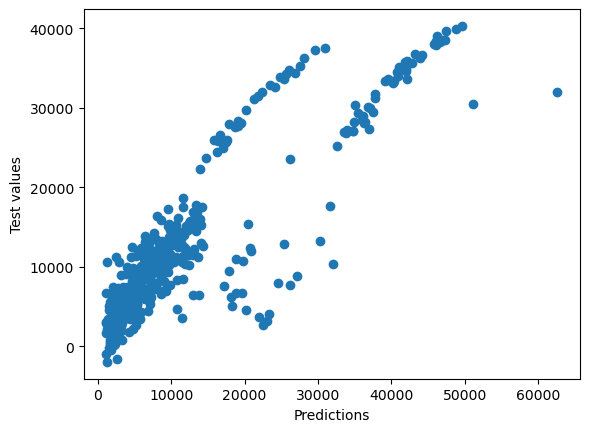

In [87]:
X_train, X_test, Y_train , Y_test = train_test_split(X_ohe,y,test_size=0.3, random_state=24)
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
plt.scatter(Y_test, y_pred)
plt.xlabel('Predictions')
plt.ylabel('Test values')
plt.show()


In [88]:
print(r2_score(Y_test, y_pred))

0.7665391799816873


# Intercet for Equation 

In [90]:
#For BMI 
X =  insurance[['bmi', 'children']]
y = insurance['charges']
lr.fit(X, y)
print('b0:', lr.intercept_,'b1:', lr.coef_)

b0: 523.5994914397616 b1: [392.21400059 657.7746999 ]


In [91]:
# X =  insurance[['bmi']]
# y = insurance['charges']
#X_ohe = pd.get_dummies(X,drop_first=True)
# lr.fit(X_ohe, y)
# print(lr.intercept_, lr.coef_)


#For smoker 
X = X_ohe[['smoker_yes']]
y = insurance['charges']
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

8434.268297856215 [23615.96353368]


In [92]:
X.columns

Index(['smoker_yes'], dtype='object')

In [93]:
insurance.groupby('smoker')['charges'].mean()
# 8434.268297856215  + 23615.96353368 * smoker_yes
#For smoker_no value will always be 8434.268298

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [94]:
#Calculate for regions 
X =  insurance[['region']]
y = insurance['charges']
X_ohe = pd.get_dummies(X,drop_first=True)
lr.fit(X_ohe, y)
print(lr.intercept_, lr.coef_)

13406.384516385804 [ -988.80914242  1329.02692122 -1059.44713909]


In [95]:
X_ohe.columns

Index(['region_northwest', 'region_southeast', 'region_southwest'], dtype='object')

In [96]:
insurance.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

# Using Polynomial Equation 

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [99]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,)

In [100]:
X = insurance.drop('charges', axis = 1)
X_ohe = pd.get_dummies(X, drop_first=True)
y = insurance['charges']
X_ohe

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [101]:
poly = PolynomialFeatures(degree = 2 , include_bias=False)
insurance_poly = poly.fit_transform(X_ohe)


In [102]:
x = poly.get_feature_names_out()
x

array(['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'age^2', 'age bmi', 'age children', 'age sex_male',
       'age smoker_yes', 'age region_northwest', 'age region_southeast',
       'age region_southwest', 'bmi^2', 'bmi children', 'bmi sex_male',
       'bmi smoker_yes', 'bmi region_northwest', 'bmi region_southeast',
       'bmi region_southwest', 'children^2', 'children sex_male',
       'children smoker_yes', 'children region_northwest',
       'children region_southeast', 'children region_southwest',
       'sex_male^2', 'sex_male smoker_yes', 'sex_male region_northwest',
       'sex_male region_southeast', 'sex_male region_southwest',
       'smoker_yes^2', 'smoker_yes region_northwest',
       'smoker_yes region_southeast', 'smoker_yes region_southwest',
       'region_northwest^2', 'region_northwest region_southeast',
       'region_northwest region_southwest', 'region_southeast^2',
       'region

In [103]:
len(x)

44

In [104]:
lrPoly  = LinearRegression()


In [105]:
X_train, X_test, Y_train , Y_test = train_test_split(insurance_poly,y,test_size=0.3, random_state=24)

In [106]:
lrPoly.fit(X_train, Y_train)
y_pred = lrPoly.predict(X_test)

In [107]:
print(r2_score(Y_test, y_pred))

0.848498245797667


In [116]:
#Ridge - L2 regularization
a = [0.01,0.1,0.5,1,1.4,2]

In [118]:
for ele in a:
    ridge = Ridge(alpha = ele)
    ridge.fit(X_train,Y_train)
    y_pred = ridge.predict(X_test)
    print(r2_score(Y_test,y_pred))

0.8485104381357735
0.848616250069389
0.8490111784477994
0.8493678537064338
0.8495714749354893
0.8497772404773916


In [120]:
#For Lasso- L1 regularizattion
for ele in a:
    lasso = Lasso(alpha = ele)
    lasso.fit(X_train,Y_train)
    y_pred = lasso.predict(X_test)
    print(r2_score(Y_test,y_pred))

0.8485013253434718
0.8485373966595495
0.8486071583732864
0.8487136272333696
0.8487881145128982
0.8490353035647414


C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+10, tolerance: 1.348e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+10, tolerance: 1.348e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features